# A Support Vector Machine

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
import numpy as np
from mySVM.datahandler import IrisData, DigitData
from mySVM.svm import SVM, Classifier
from mySVM.solvers import QP, SMO, SKL
from mySVM.kernel import Kernel

## Iris

In [3]:
iris = IrisData('iris.csv', 0.2)
iris.set_class_of_interest('setosa')

In [4]:
myKernel = Kernel('gaussian', 2)

In [4]:
qp = QP(myKernel)

NameError: name 'myKernel' is not defined

In [6]:
machine = SVM(iris, qp, myKernel)

In [7]:
machine.train()

In [35]:
machine.test()

1.0

In [9]:
w = machine.get_normal()

In [10]:
w/max(abs(w))

array([-0.37332993,  0.16280324, -1.        , -0.39226923])

In [37]:
x = [i for i in range(1, 102, 20)]
y = []
for i in x:
    t = machine.get_training_time(i, 10)
    y.append(t)

In [26]:
import matplotlib.pyplot as plt

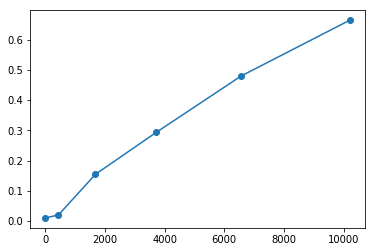

In [43]:
plt.plot([i**2 for i in x], y, '-o')

## Classify

In [25]:
classer = Classifier(iris, qp, myKernel)

In [26]:
classer.train()

Training for  setosa ... Complete!
Training for  versicolor ... Complete!
Training for  virginica ... Complete!


In [27]:
a = iris.getX()[7]
iris.get_entry(7)['features']

array([5.0, 3.4, 1.5, 0.2], dtype=object)

In [28]:
iris.get_class_names()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [29]:
a = iris.get_entry(47)
print(a['label'])
classer.classify(a['features'])

setosa


'setosa'

In [30]:
classer.minitest(10)

Score: 100%


,prediction,actual,correct
121,virginica,virginica,True
90,versicolor,versicolor,True
15,setosa,setosa,True
18,setosa,setosa,True
146,virginica,virginica,True
141,virginica,virginica,True
7,setosa,setosa,True
99,versicolor,versicolor,True
13,setosa,setosa,True
58,versicolor,versicolor,True


## Digits

In [5]:
digits = DigitData('digits.csv', 0.1)

In [6]:
digitKernel = Kernel('polynomial', 2, 2)

In [31]:
digit_classer = Classifier(digits, qp, myGaussian)

In [32]:
digit_classer.train()

Training for  0 ... Complete!
Training for  1 ... Complete!
Training for  2 ... Complete!
Training for  3 ... Complete!
Training for  4 ... Complete!
Training for  5 ... Complete!
Training for  6 ... Complete!
Training for  7 ... Complete!
Training for  8 ... Complete!
Training for  9 ... Complete!


In [ ]:
digit_classer.minitest(100)

In [23]:
a = digits.get_entry(9876)
print(a['label'])
digit_classer.classify(a['features'])

5


5

# Performance Analysis

## Utilities

In [10]:
def time_plot(func, start, end, step, iters):
    x = [i for i in range(start, end, step)]
    y = []
    for i in x:
        t = func(i, iters)
        y.append(t)
    return x, y

## Setup

In [ ]:
digits = DigitData('digits.csv', 0.1)

In [16]:
myKernel = Kernel('gaussian', 2, 2)
qp = QP(myKernel)
Dmachine = SVM(digits, qp, myKernel)

## Measurement

In [20]:
import matplotlib.pyplot as plt

In [17]:
x, y = time_plot(Dmachine.get_training_time, 1, 201, 20, 50)

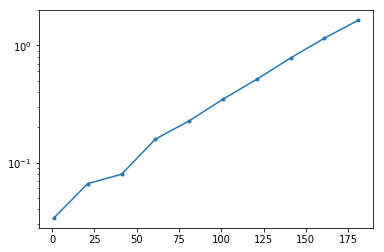

In [34]:
plt.semilogy([i for i in x], y, '.-')

In [22]:
x

[1, 21, 41, 61, 81, 101, 121, 141, 161, 181]

In [23]:
y

[0.0336460000000001,
 0.06607772000000381,
 0.07938052000000141,
 0.15843665999999756,
 0.22686484000000406,
 0.3475248400000021,
 0.51408768,
 0.7815813800000047,
 1.153198080000002,
 1.6403755200000045]

# Solver Comparison

In [9]:
iris = IrisData('iris.csv', 0.2)
iris.set_class_of_interest('setosa')

In [4]:
polykern = Kernel('gaussian', 3, 0)

In [81]:
qp = QP(polykern)
sk = SKL(polykern)
sk_machine = SVM(iris, sk, polykern)
qp_machine = SVM(iris, qp, polykern)

In [70]:
sk_machine.train()
sk_machine.test()

0.8333333333333334

In [83]:
qp_machine.train()
qp_machine.test()

[0.14624396 0.04183857 0.16857849 0.23695887 0.02368426 0.20873475
 0.76834265 0.79757112 0.8656698  0.55558139 0.04761894 0.36280357
 0.82826671 0.22772625 0.58568388 0.40600605 0.05048608 0.04819591
 0.30748161 0.55216088 0.32180592 0.34915738 0.36156555 0.05686321
 0.3442838  0.52830808 0.12635652 0.04727697 0.12826317 0.15150738
 0.01175962 0.09362066 0.35191181 0.06318152 0.28221482 0.30888034
 0.1009259  0.17731289 0.13338466 0.0349643  0.09922665 0.13190279
 0.20238744 0.08429775 0.03740076 0.18584184 0.01549267 0.01466059
 0.21450087 0.26263989 0.14203648 0.15779417 0.09240319 0.02070786
 0.12850436 0.35826809 0.06762916 0.3398212  0.07342386 0.06385361
 0.17367243 0.41573136 0.16905297 0.27915686 0.34326743 0.07339743
 0.0153883  0.00695201 0.17975633 0.29167459 0.04979117 0.35796049
 0.23604983 0.07220348 0.157573   0.32701049 0.06631002 0.14083141
 0.06814113 0.24006325 0.147571   0.35877083 0.02877196 0.30901714
 0.28994873 0.06453215 0.03181035 0.07258748 0.25237093 0.0907

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [72]:
qp_machine.Solver.iter_count

100

In [74]:
qp_machine.

array([  2,   3,   4,   5,   8,  10,  11,  12,  13,  14,  15,  16,  18,
        19,  20,  21,  24,  25,  27,  28,  29,  31,  33,  35,  36,  37,
        38,  39,  40,  43,  44,  45,  46,  47,  48,  49,  51,  52,  53,
        55,  56,  57,  58,  59,  60,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  75,  76,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  99,
       100, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 118, 119])

In [14]:
X = iris.getX('test')
y = iris.gety('test')
sk_machine.Solver.sub_svm.score(X, y)

1.0

In [15]:
sk_machine.alphas

array([-0.2506573 , -0.05772032, -1.        , -0.24751111, -0.08931985,
       -0.06141773, -0.28705144, -0.32288982, -0.05558671,  0.85332392,
        0.51883036,  1.        ])

In [16]:
sk_machine.Solver.sub_svm.support_

array([ 51,  59,  75,  79,  91,  93,  97, 106, 108,  13,  20,  36],
      dtype=int32)

In [17]:
i = sk_machine.Solver.sub_svm.support_

In [22]:
qp_machine.alphas[i]

array([0.30887391, 0.20238737, 0.35826981, 0.33982118, 0.29167448,
       0.35796039, 0.32701041, 0.35877073, 0.3090171 , 0.8656699 ,
       0.58566647, 1.        ])

### Idea: try using the vector weights to calculate the value of the ojective function in the Dual problem

In [47]:
def calc_gramm_matrix(X, y):
    number_of_samples = len(y)
    H = np.zeros((number_of_samples, number_of_samples))
    for i, _ in enumerate(y):
        for j, _ in enumerate(y):
            H[i, j] = y[i]*y[j]*X[i].dot(X[j])
    return H

def calc_val_of_dual_objective(svm_weight_array, X, y):
    """ We want to maximise the returned value """
    weight_sum = sum(svm_weight_array)
    H = calc_gramm_matrix(X, y)
    quad_term = svm_weight_array.dot(H).dot(svm_weight_array)
    return weight_sum - 1/2*quad_term    

In [51]:
# Rebuild sk weight matrix
n = iris.get_sample_count('train')
sk_w = np.zeros(n)
for i, w in zip(sk_machine.Solver.sub_svm.support_, sk_machine.alphas):
    sk_w[i] = w

In [52]:
calc_val_of_dual_objective(sk_w, iris.getX('train'), iris.gety('train'))

-568.5239802991764

In [53]:
calc_val_of_dual_objective(qp_machine.alphas, iris.getX('train'), iris.gety('train'))

-924.3368558282941

In [54]:
max(qp_machine.alphas)

0.9999999954926415

In [55]:
min(qp_machine.alphas)

7.109095324551209e-09

In [58]:
qp_machine.Solver.status


AttributeError: 'QP' object has no attribute 'status'

In [59]:
solvers

NameError: name 'solvers' is not defined